In [14]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc

In [2]:
# # Google colab connection
# from google.colab import drive
# drive.mount('/content/drive')
# !unzip "/content/dataset.zip"

Streaming output truncated to the last 5000 lines.

  inflating: dataset/0/0_390.jpg     

  inflating: dataset/0/0_391.jpg     

  inflating: dataset/0/0_392.jpg     

  inflating: dataset/0/0_393.jpg     

  inflating: dataset/0/0_394.jpg     

  inflating: dataset/0/0_395.jpg     

  inflating: dataset/0/0_396.jpg     

  inflating: dataset/0/0_397.jpg     

  inflating: dataset/0/0_398.jpg     

  inflating: dataset/0/0_399.jpg     

  inflating: dataset/0/0_4.jpg       

  inflating: dataset/0/0_40.jpg      

  inflating: dataset/0/0_400.jpg     

  inflating: dataset/0/0_401.jpg     

  inflating: dataset/0/0_402.jpg     

  inflating: dataset/0/0_403.jpg     

  inflating: dataset/0/0_404.jpg     

  inflating: dataset/0/0_405.jpg     

  inflating: dataset/0/0_406.jpg     

  inflating: dataset/0/0_407.jpg     

  inflating: dataset/0/0_408.jpg     

  inflating: dataset/0/0_409.jpg     

  inflating: dataset/0/0_41.jpg      

  inflating: dataset/0/0_410.jpg     

  inflating:

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths
data_dir = '/kaggle/input/saadnewdataset/dataset'
img_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator instances for train, validation, and test sets with augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    validation_split=0.3  # Increase validation split to 30%
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 3725 images belonging to 10 classes.
Found 1589 images belonging to 10 classes.


In [57]:
from tensorflow.keras.applications import VGG16,Xception,InceptionV3,ResNet50,VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2

# Load the ResNet50 model pre-trained on ImageNet
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)  # Reduce the number of units
x = Dropout(0.5)(x)  # Increase dropout
predictions = Dense(10, activation='softmax')(x)  # Assuming you have 10 classes

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Make all layers trainable for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 80s 590ms/step - accuracy: 0.0979 - loss: 2.6004 - val_accuracy: 0.1699 - val_loss: 2.3024 - learning_rate: 1.0000e-06
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 68s 554ms/step - accuracy: 0.1078 - loss: 2.3904 - val_accuracy: 0.1913 - val_loss: 2.2630 - learning_rate: 1.0000e-06
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 69s 563ms/step - accuracy: 0.1068 - loss: 2.3388 - val_accuracy: 0.3008 - val_loss: 2.2024 - learning_rate: 1.0000e-06
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 70s 572ms/step - accuracy: 0.1452 - loss: 2.2770 - val_accuracy: 0.5670 - val_loss: 2.0825 - learning_rate: 1.0000e-06
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 70s 570ms/step - accuracy: 0.1937 - loss: 2.2080 - val_accuracy: 0.6425 - val_loss: 1.8344 - learning_rate: 1.0000e-06
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 69s 566ms/step - accuracy: 0.2633 - loss: 2.0790 - val_accuracy: 0.6809 - val_loss: 1.4624 - learning_rate: 1.0000e-06
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 69s 56

Found 5314 images belonging to 10 classes.
167/167 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.9761 - loss: 0.0881
Test accuracy from evaluate: 97.55%
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step
Accuracy: 0.9755363191569439


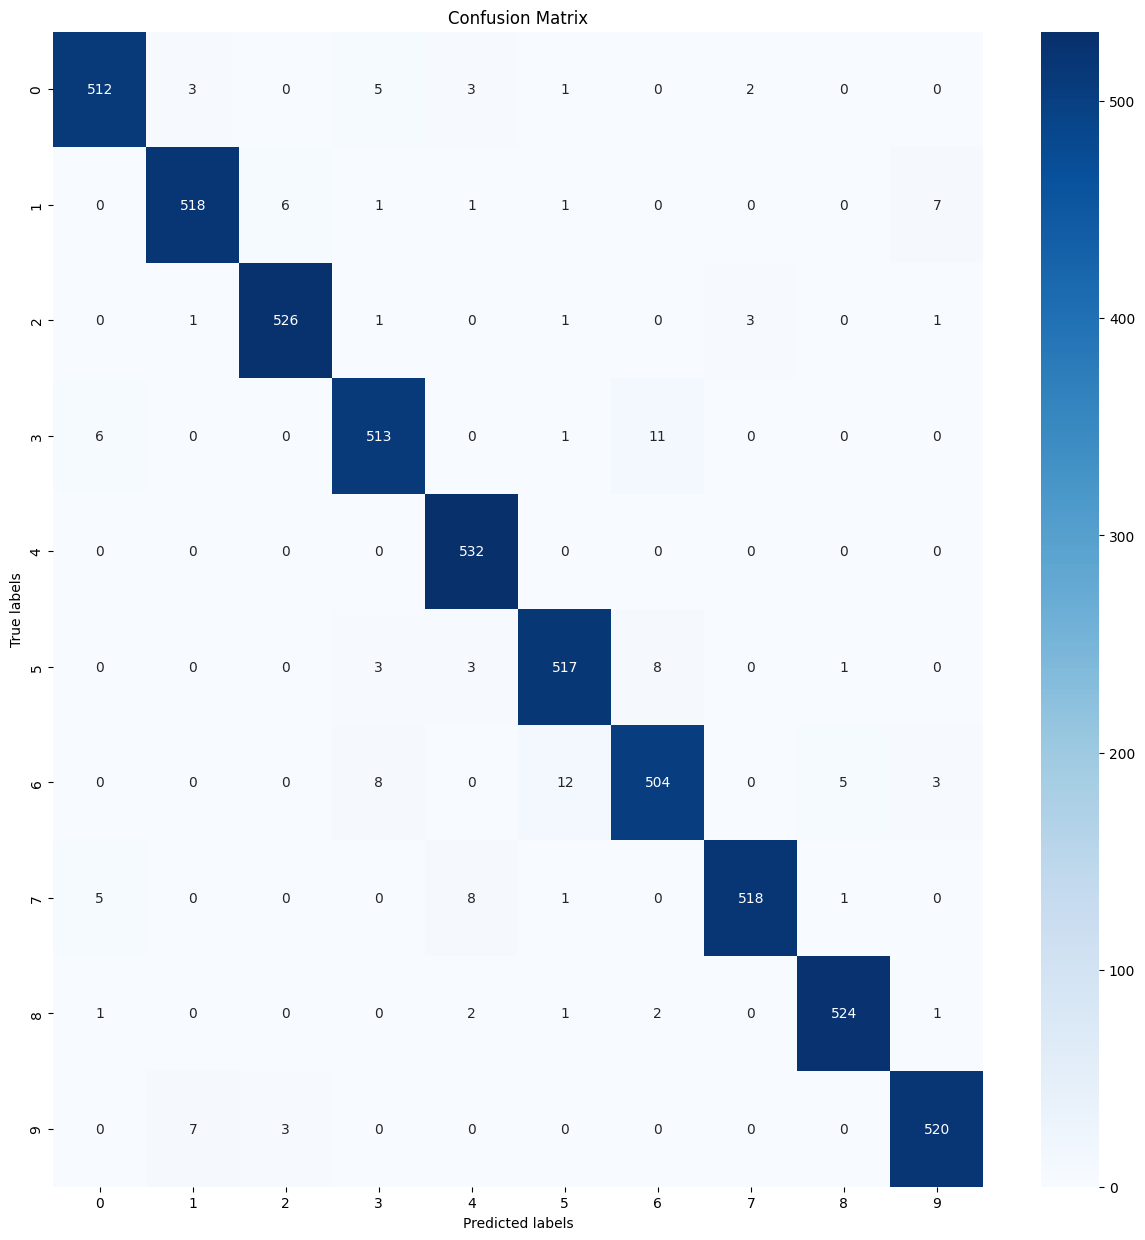

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       526
           1       0.98      0.97      0.97       534
           2       0.98      0.99      0.99       533
           3       0.97      0.97      0.97       531
           4       0.97      1.00      0.98       532
           5       0.97      0.97      0.97       532
           6       0.96      0.95      0.95       532
           7       0.99      0.97      0.98       533
           8       0.99      0.99      0.99       531
           9       0.98      0.98      0.98       530

    accuracy                           0.98      5314
   macro avg       0.98      0.98      0.98      5314
weighted avg       0.98      0.98      0.98      5314

Overall ROC AUC Score: 0.9993511657953942


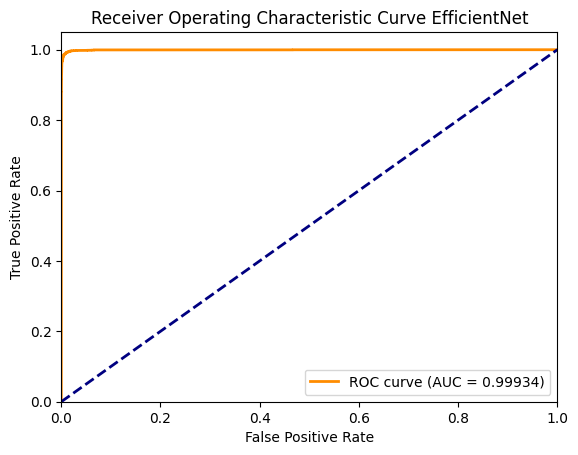

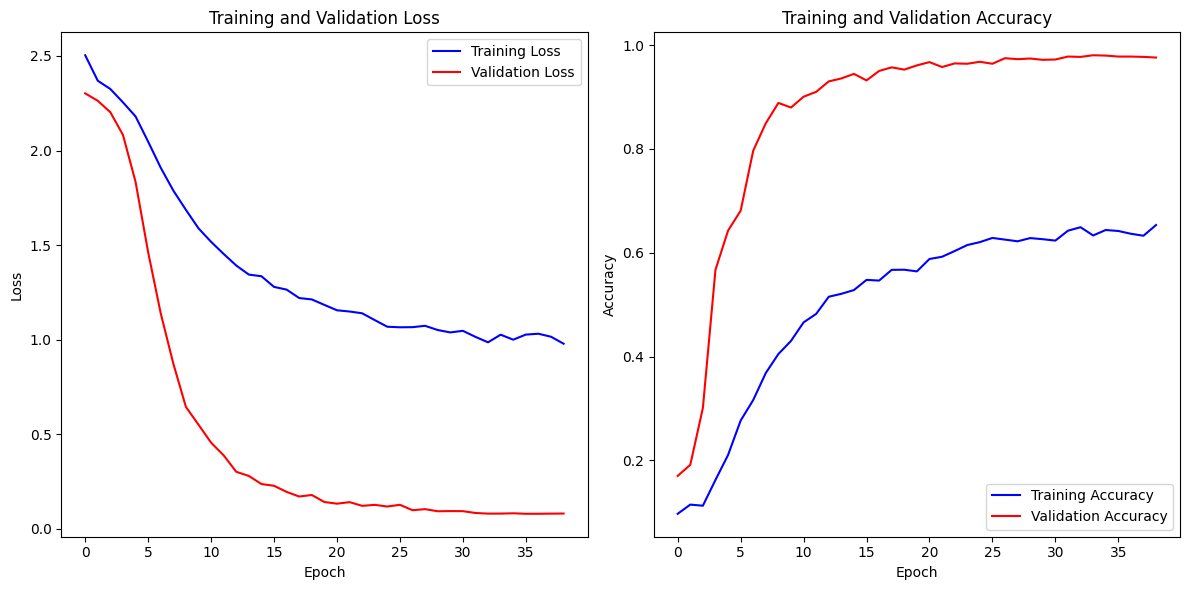

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score

# Recheck Data Generators
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/saadnewdataset/dataset',  # Make sure this directory is correct
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for consistency in predictions
)

# 1. Evaluate model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy from evaluate: {test_acc * 100:.2f}%')


# Evaluate the model on test set
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate overall ROC AUC score
roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_true), predictions, average='macro')
print("Overall ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(tf.keras.utils.to_categorical(y_true).ravel(), predictions.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve EfficientNet')
plt.legend(loc="lower right")
plt.show()

# Plot loss and accuracy per epoch
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()